In [1]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual class')
        plt.xlabel('Predicted class' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [3]:
data = pd.read_csv('/home/ceci/Desktop/perf/DATA_MU/mucomb.csv')

X = data.drop(['val','aro','posneg','dem'], axis=1)
y = data['posneg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

In [4]:
scaler_ss = preprocessing.StandardScaler()
scaler_mm = preprocessing.MinMaxScaler()
########################################################
X_train_ss = scaler_ss.fit_transform(X_train, y_train)
X_test_ss = scaler_ss.transform(X_test)

X_train_mm = scaler_mm.fit_transform(X_train, y_train)
X_test_mm = scaler_mm.transform(X_test)

WITHOUT FEATURE SELECTION & REDUCTION

In [ ]:
#CLASSIFIER
model_svm = SVC()
parameters_svm_ss = {'kernel': ['rbf'], 
              'C': [100], 
              'gamma': [0.01]}

parameters_svm_mm = {'kernel': ['rbf'], 
              'C': [100], 
              'gamma': [1]}

model_knn = KNeighborsClassifier()
parameters_knn = {'n_neighbors': [2],
              'weights': ['distance'], 
              'metric': ['hamming']}

In [5]:
#CROSS VALIDATION
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#TRAINING
########### SVM TRAINING #############')
gs_ss_svm = GridSearchCV(model_svm, parameters_svm_ss, refit=True, cv=cv, verbose=3, return_train_score=True, n_jobs=-1) 
gs_ss_svm.fit(X_train_ss, y_train)
print(gs_ss_svm.best_estimator_)
print(gs_ss_svm.cv_results_)

In [ ]:
gs_mm_svm = GridSearchCV(model_svm, parameters_svm_mm, refit=True, cv=cv, verbose=3, return_train_score=True, n_jobs=-1) 
gs_mm_svm.fit(X_train_mm, y_train)
print(gs_mm_svm.best_estimator_)
print(gs_mm_svm.cv_results_)

In [ ]:
########### KNN TRAINING #############')
gs_ss_knn = GridSearchCV(model_knn, parameters_knn, refit=True, cv=cv, verbose=3, return_train_score=True, n_jobs=-1) 
gs_ss_knn.fit(X_train_ss, y_train)
print(gs_ss_knn.best_estimator_)
print(gs_ss_knn.cv_results_)

In [ ]:
gs_mm_knn = GridSearchCV(model_knn, parameters_knn, refit=True, cv=cv, verbose=3, return_train_score=True, n_jobs=-1) 
gs_mm_knn.fit(X_train_mm, y_train)
print(gs_mm_knn.best_estimator_)
print(gs_mm_knn.cv_results_)

In [ ]:
#TESTING
print('##################### SVM TESTING #####################')
print('StandardScaler________________________________________')
gp_ss_svm = gs_ss_svm.predict(X_test_ss)
cm_ss = confusion_matrix(y_test,gp_ss_svm)
# print(cm_ss)
print(classification_report(y_test,gp_ss_svm))

print('MinMaxScaler__________________________________________')
gp_mm_svm = gs_mm_svm.predict(X_test_mm)
cm_mm = confusion_matrix(y_test,gp_mm_svm)
# print(cm_mm)
print(classification_report(y_test,gp_mm_svm))

In [ ]:
print('##################### KNN TESTING #####################')
print('StandardScaler________________________________________')
gp_ss_knn = gs_ss_knn.predict(X_test_ss)
cf_ss = confusion_matrix(y_test,gp_ss_knn)
# print(cf_ss)
print(classification_report(y_test,gp_ss_knn))

print('MinMaxScaler__________________________________________')
gp_mm_knn = gs_mm_knn.predict(X_test_mm)
cf_mm = confusion_matrix(y_test,gp_mm_knn)
# print(cf_mm)
print(classification_report(y_test,gp_mm_knn))

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
fig_cm_ss = make_confusion_matrix(cm_ss, group_names=labels, figsize=(6,4), title='Testing Confusion Matrix (SS, SVM)', cbar=True, cmap='Blues')
plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/ALL_PN_SS_SVM.png')
plt.show()

fig_cf_mm = make_confusion_matrix(cm_mm, group_names=labels, figsize=(6,4), title='Testing Confusion Matrix (MM, SVM)', cbar=True, cmap='Blues')
plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/ALL_PN_MM_SVM.png')
plt.show()

In [ ]:
fig_cf_ss = make_confusion_matrix(cf_ss, group_names=labels, figsize=(6,4), title='Testing Confusion Matrix (SS, KNN)', cbar=True, cmap='Oranges')
plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/ALL_PN_SS_KNN.png')
plt.show()

fig_cf_mm = make_confusion_matrix(cf_mm, group_names=labels, figsize=(6,4), title='Testing Confusion Matrix (MM, KNN)', cbar=True, cmap='Oranges')
plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/ALL_PN_MM_KNN.png')
plt.show()

WITH SFS FEATURE SELECTION

In [ ]:
#### SFS KNN
knn_s = KNeighborsClassifier(n_neighbors=2, metric='hamming', weights='distance')

sfs_ss_knn = SFS(estimator=knn_s, 
           k_features=4,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sfs_ss_knn.fit(X_train_ss, y_train)

In [ ]:
print('best combination (ACC: %.3f): %s\n' % (sfs_ss_knn.k_score_, sfs_ss_knn.k_feature_idx_))
#print('all subsets:\n', sfs_ss.subsets_)
fig1 = plot_sfs(sfs_ss_knn.get_metric_dict(), figsize=(33,12) ,kind='std_err')
plt.title('Number of Selected Features Subset with Highest Performing Wrapper Method using SFS (Pos/Neg-StandardScaler-KNN)')
plt.grid()
# plt.savefig('C:/Users/ANAS/Desktop/perf/perf_vm/MU/MUPNSFSssKNN.jpg')
plt.show()

In [ ]:
knn_m = KNeighborsClassifier(n_neighbors=2, metric='hamming', weights='distance')

sfs_mm_knn = SFS(estimator=knn_m, 
           k_features=3,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sfs_mm_knn.fit(X_train_mm, y_train)

In [ ]:
print('best combination (ACC: %.3f): %s\n' % (sfs_mm_knn.k_score_, sfs_mm_knn.k_feature_idx_))
#print('all subsets:\n', sfs_mm.subsets_)
fig2 = plot_sfs(sfs_mm_knn.get_metric_dict(), figsize=(33,12) ,kind='std_err')
plt.title('Number of Selected Features Subset with Highest Performing Wrapper Method using SFS (Pos/Neg-MinMaxScaler-KNN)')
plt.grid()
# plt.savefig('C:/Users/ANAS/Desktop/perf/perf_vm/MU/MUPNSFSmmKNN.jpg')
plt.show()

In [6]:
#### SFS SVM
svm_s = SVC(C=100, kernel= 'rbf', gamma=0.01)

sfs_ss_svm = SFS(estimator=svm_s, 
           k_features=80,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sfs_ss_svm.fit(X_train_ss, y_train)

SequentialFeatureSelector(estimator=SVC(C=100, gamma=0.01), k_features=80,
                          n_jobs=-1, scoring='accuracy')

best combination (ACC: 0.816): (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 59, 60, 64, 65, 66, 69, 71, 72, 73, 76, 78, 99, 101, 102, 104, 105, 108, 109, 110, 113, 114, 117, 119, 120, 122, 125)



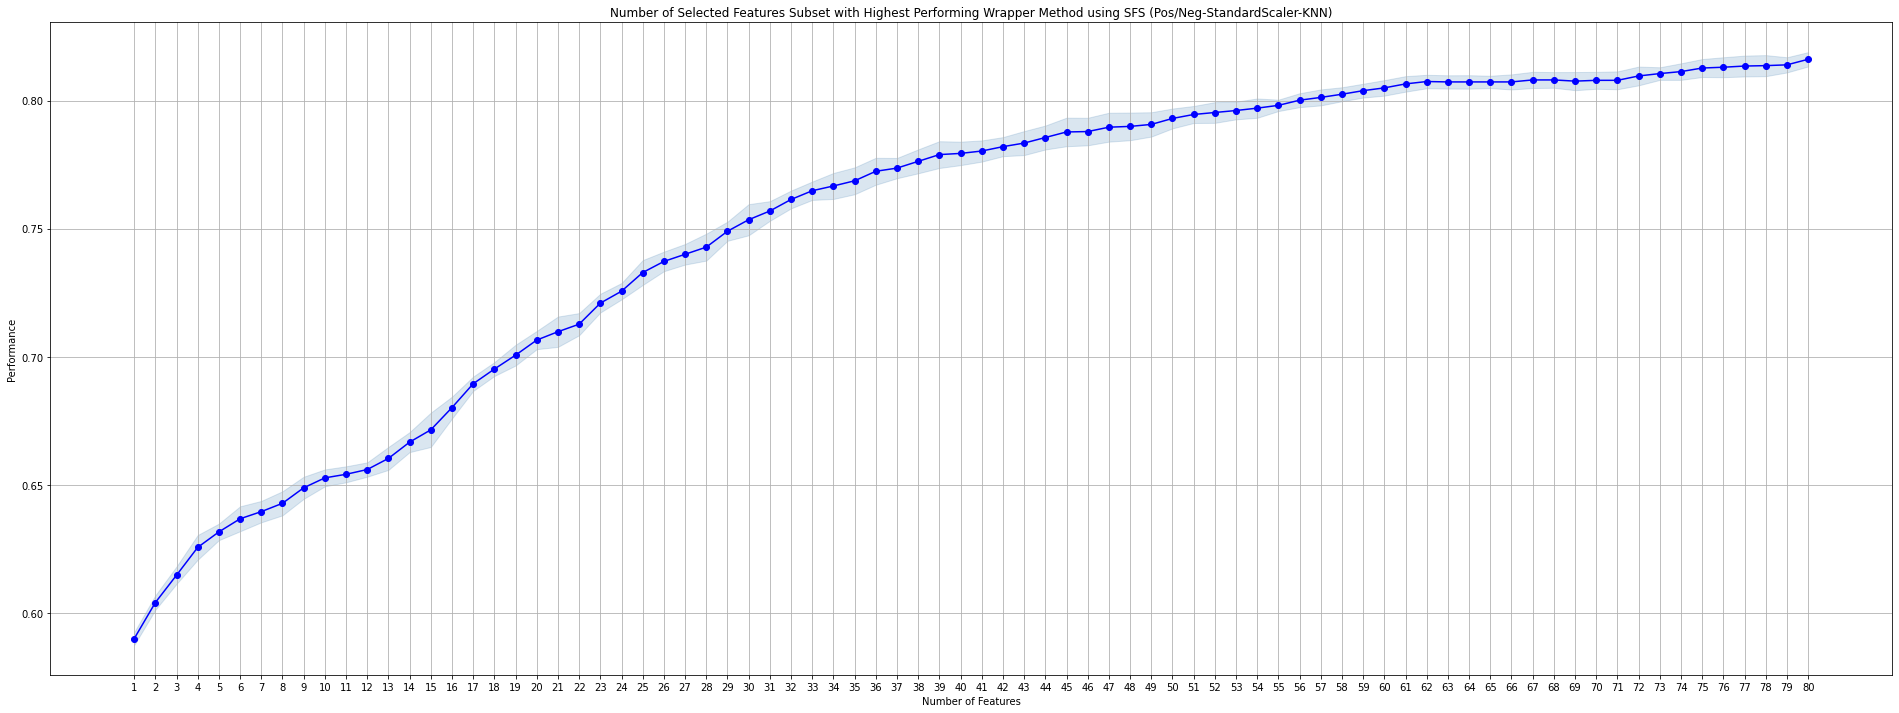

In [7]:
print('best combination (ACC: %.3f): %s\n' % (sfs_ss_svm.k_score_, sfs_ss_svm.k_feature_idx_))
#print('all subsets:\n', sfs_ss.subsets_)
fig1 = plot_sfs(sfs_ss_svm.get_metric_dict(), figsize=(33,12) ,kind='std_err')
plt.title('Number of Selected Features Subset with Highest Performing Wrapper Method using SFS (Pos/Neg-StandardScaler-KNN)')
plt.grid()
# plt.savefig('C:/Users/ANAS/Desktop/perf/perf_vm/MU/MUPNSFSssKNN.jpg')
plt.show()

In [ ]:
svm_m = SVC(C=100, kernel= 'rbf', gamma=1)

sfs_mm_svm = SFS(estimator=svm_m, 
           k_features=80,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sfs_mm_svm.fit(X_train_mm, y_train)

In [ ]:
print('best combination (ACC: %.3f): %s\n' % (sfs_mm_svm.k_score_, sfs_mm_svm.k_feature_idx_))
#print('all subsets:\n', sfs_mm.subsets_)
fig2 = plot_sfs(sfs_mm_svm.get_metric_dict(), figsize=(33,12) ,kind='std_err')
plt.title('Number of Selected Features Subset with Highest Performing Wrapper Method using SFS (Pos/Neg-MinMaxScaler-KNN)')
plt.grid()
# plt.savefig('C:/Users/ANAS/Desktop/perf/perf_vm/MU/MUPNSFSmmKNN.jpg')
plt.show()

In [ ]:
satu = pd.DataFrame.from_dict(sfs_ss_knn.get_metric_dict()).T
x_satu  = satu.index.values.tolist()
y_satu = satu['avg_score'].values.tolist()
# print(satu['feature_idx'])
plt.plot(x_satu, y_satu, label = "KNN with StandardScaler")

dua = pd.DataFrame.from_dict(sfs_mm_knn.get_metric_dict()).T
x_dua  = dua.index.values.tolist()
y_dua = dua['avg_score'].values.tolist()
# print(dua['feature_idx'])
plt.plot(x_dua, y_dua, label = "KNN with MinMaxScaler")

tiga = pd.DataFrame.from_dict(sfs_ss_svm.get_metric_dict()).T
x_tiga  = tiga.index.values.tolist()
y_tiga = tiga['avg_score'].values.tolist()
# print(tiga['feature_idx'])
plt.plot(x_tiga, y_tiga, label = "SVM with StandardScaler")

empat = pd.DataFrame.from_dict(sfs_mm_svm.get_metric_dict()).T
x_empat  = empat.index.values.tolist()
y_empat = empat['avg_score'].values.tolist()
# print(empat['feature_idx'])
plt.plot(x_empat, y_empat, label = "SVM with MinMaxScaler")

plt.xticks(x_empat) #kena tukar pada x scale yg paling bnyk
plt.xlabel('Number of Features Selected')
plt.ylabel('Average Cross Validated Iteration Accuracy')
plt.title('Wrapper Method-SFS Performance Comparison Between Classifiers and Data Scaling'

# plt.plt.legend()
# plt.rcParams["figure.figsize"] = (30,7)
# plt.savefig('/home/ceci/Desktop/perf/MU/CF/L.jpg')
# plt.show()


In [ ]:
#REMOVING THE USELESS COLUMNS FROM SFS
X_train_ss_sfs_knn = sfs_ss_knn.transform(X_train_ss)
X_test_ss_sfs_knn = sfs_ss_knn.transform(X_test_ss)

X_train_mm_sfs_knn = sfs_mm_knn.transform(X_train_mm)
X_test_mm_sfs_knn = sfs_mm_knn.transform(X_test_mm)

X_train_ss_sfs_svm = sfs_ss_svm.transform(X_train_ss)
X_test_ss_sfs_svm = sfs_ss_svm.transform(X_test_ss)

X_train_mm_sfs_svm = sfs_mm_svm.transform(X_train_mm)
X_test_mm_sfs_svm = sfs_mm_svm.transform(X_test_mm)

In [ ]:
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
param_grid_svm = {'C': [100], 'gamma': ['auto', 'scale'],'kernel': ['rbf']}

# param_grid = {'n_neighbors': [2, 3, 5, 7, 90, 45],
#               'weights': ['uniform', 'distance'],
#               'metric': ['euclidean', 'manhattan']}

param_grid_knn = {'n_neighbors': [2],
              'weights': ['distance'],
              'metric': ['hamming']}


In [ ]:
grid_ss_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, refit=True,cv=10,verbose=3,return_train_score=True, n_jobs=-1) 
grid_ss_knn.fit(X_train_ss_sfs_knn,y_train)
# print(grid_ss_knn.best_estimator_)
# print(grid_ss_knn.cv_results_)

In [ ]:
grid_mm_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, refit=True,cv=10,verbose=3,return_train_score=True, n_jobs=-1) 
grid_mm_knn.fit(X_train_mm_sfs_knn,y_train)
# print(grid_mm_knn.best_estimator_)
# print(grid_mm_knn.cv_results_)

In [ ]:
grid_ss_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, refit=True,cv=10,verbose=3,return_train_score=True, n_jobs=-1) 
grid_ss_svm.fit(X_train_ss_sfs_svm,y_train)
# print(grid_ss_svm.best_estimator_)
# print(grid_ss_svm.cv_results_)

In [ ]:
grid_mm_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, refit=True,cv=10,verbose=3,return_train_score=True, n_jobs=-1) 
grid_mm_svm.fit(X_train_mm_sfs_svm,y_train)
# print(grid_mm_svm.best_estimator_)
# print(grid_mm_svm.cv_results_)

In [ ]:
print('################### SFS-KNN TESTING ###################')
print('StandardScaler________________________________________')
grid_predictions_ss_knn = grid_ss_knn.predict(X_test_ss_sfs_knn)
mat1 = confusion_matrix(y_test,grid_predictions_ss_knn)
# print(mat1)
print(classification_report(y_test,grid_predictions_ss_knn))

print('MinMaxScaler__________________________________________')
grid_predictions_mm_knn = grid_mm_knn.predict(X_test_mm_sfs_knn)
mat2 = confusion_matrix(y_test,grid_predictions_mm_knn)
# print(mat2)
print(classification_report(y_test,grid_predictions_mm_knn))

In [ ]:
print('################### SFS-SVM TESTING ###################')
print('StandardScaler________________________________________')
grid_predictions_ss_svm = grid_ss_svm.predict(X_test_ss_sfs_svm)
mat3 = confusion_matrix(y_test,grid_predictions_ss_svm)
# print(mat3)
print(classification_report(y_test,grid_predictions_ss_svm))

print('MinMaxScaler__________________________________________')
grid_predictions_mm_svm = grid_mm_svm.predict(X_test_mm_sfs_svm)
mat4 = confusion_matrix(y_test,grid_predictions_mm_svm)
# print(mat4)
print(classification_report(y_test,grid_predictions_mm_svm))

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
figsatu = make_confusion_matrix(mat1, group_names=labels, figsize=(6,4), title='TUKAR SINI', cbar=True, cmap='Oranges')
# plt.savefig('/home/ceci/Desktop/perf/MU/CF/TITLE.jpg')
plt.show()

figdua = make_confusion_matrix(mat2, group_names=labels, figsize=(6,4), title='TUKAR SINI', cbar=True, cmap='Oranges')
# plt.savefig('/home/ceci/Desktop/perf/MU/CF/LITTLE.jpg')
plt.show()

In [ ]:
figtiga = make_confusion_matrix(mat3, group_names=labels, figsize=(6,4), title='TUKAR SINI', cbar=True, cmap='Oranges')
# plt.savefig('/home/ceci/Desktop/perf/MU/CF/TITLE.jpg')
plt.show()

figempat = make_confusion_matrix(mat4, group_names=labels, figsize=(6,4), title='TUKAR SINI', cbar=True, cmap='Oranges')
# plt.savefig('/home/ceci/Desktop/perf/MU/CF/LITTLE.jpg')
plt.show()

WITH LDA FEATURE REDUCTION

In [ ]:
#DIMENSIONALITY REDUCTION
lda_ss = LDA(n_components=1)
lda_mm = LDA(n_components=1)

X_train_ss_lda = lda_ss.fit_transform(X_train_ss_sfs, y_train)
X_test_ss_lda = lda_ss.transform(X_test_ss_sfs)

X_train_mm_lda = lda_mm.fit_transform(X_train_mm_sfs, y_train)
X_test_mm_lda = lda_mm.transform(X_test_mm_sfs)

In [ ]:
grid_ss.fit(X_train_ss_lda,y_train)
grid_mm.fit(X_train_mm_lda,y_train)

In [ ]:
print(grid_ss.best_estimator_)
print(grid_mm.best_estimator_)

print(grid_ss.cv_results_)
print(grid_mm.cv_results_)

In [ ]:
grid_predictions_ss = grid_ss.predict(X_test_ss_lda)
print(confusion_matrix(y_test,grid_predictions_ss))
print(classification_report(y_test,grid_predictions_ss))
print('\n')
grid_predictions_mm = grid_mm.predict(X_test_mm_lda)
print(confusion_matrix(y_test,grid_predictions_mm))
print(classification_report(y_test,grid_predictions_mm))